# Topic 11: Zoeken en Sorteren
------------------

In wat voorafging hebben we reeds een aantal interessante algoritmen
gezien voornamelijk om numerieke problemen op te lossen. T.t.z. we
hebben Python gebruikt om wiskundige problemen uit te rekenen. In dit
hoofdstuk gaan we verder met de studie van een aantal algoritmen die bij
de kern van de computerwetenschappen horen. We spitsen onze aandacht
toe op twee van de kerntaken die van computers zeer vaak verwacht
worden: *zoeken* en *sorteren*.

"Het zoekprobleem" bestaat uit het vinden een
gegeven data element in een grote hoop data. De toepassingen
hiervan zijn haast niet te tellen. Denk maar aan een
woordenboekapp waarin je verklaringen of vertalingen van een gegeven woord
kan opzoeken, aan
het elektronische telefoonboek dat in je GSM zit, aan Google die je snel
de sites voor gevraagde sleutelwoorden kan leveren, enz. Omwille van de
gigantische hoeveelheid toepassingen van "het zoekprobleem" is het 
mogelijk om hierover boeken vol te schrijven. In dit hoofdstuk
beperken we ons tot de basis: we bestuderen de bekendste algoritmen om
een element in een lijst te zoeken.

"Het sorteerprobleem" is al even alomtegenwoordig. Denk opnieuw aan het
telefoonboek in je GSM dat alfabetisch gesorteerd is. Een ander
voorbeeld is de "sort" menukeuze in het beroemde Excel rekenblad,
waarmee je het rekenblad kan sorteren op een bepaalde kolom of rij. Ten
slotte vermelden we nog "de flapjes" in iTunes waarmee je je playlists
kan sorteren op titel, artiest, enz. Dit zijn allen voorbeelden van
lijsten met gegevens erin die door de computer herschikt dienen te
worden zodat de gegevens uiteindelijk in gesorteerde volgorde komen te
staan.

## Zoeken in Lijsten
-----------------


Het eerste probleem waar we ons in dit hoofdstuk op toespitsen is het
zoeken van de positie van een gegeven element in een gegeven lineaire datastructuur. 
Dit is wat achter de schermen gebeurt als je bijvoorbeeld
een naam opzoekt in het telefoonboek van je GSM of als je een woord
opzoekt in een elektronisch woordenboek. Concreet gaan we zoeken naar de index van 
een gegeven element in een Python lijst van lengte $n$. Maar een groot stuk van de 
bespreking en analyse geldt in het algemeen voor zoeken in een lineaire structuur.
Bedoeling is dus om een Python
functie `find(lst,elm)` te schrijven die het elementje `elm` opzoekt in
de lijst `lst`. Op zich klinkt dit wat raar: waarom een element zoeken
in een lijst als je dat element al vasthebt? Soms is het op zich belangrijk om te 
kunnen controleren of een gegeven element in een lange lijst voorkomt, i.e. heb ik 
een telefoonnummer voor *Jan*. Een andere nuance is dat
`find` de *index*, i.e. de plaats van dat element gaat teruggeven. Je vindt dan in je 
telefoonbook naast de naam die je opzocht het telefoonnummer dat je zocht. 
Er moet ook een manier zijn om aan te geven dat het gezochte element niet
in de lijst voorkomt. Onderstaande implementaties geven dan de lengte van de lijst 
terug.  Herinner dat de grootst mogelijk index `len(lst)-1` is, dus als je een te 
grote index terugkkrijgt weet je dat het element niet gevonden werd. Soms geven 
zoekalgoritmes bv. `-1` of `False` terug om aan te geven dat het element niet 
gevonden werd. Op de plaats in je code waar je de `find` aanroept zal je dan moet 
controleren wat de  terugkeerwaarde is en daarrond dan de juist beslissing nemen.

### Lineair Zoeken

Het eerste algoritme waarmee we `find` kunnen realiseren heet *lineair
zoeken*. Het is de meest naïeve oplossing van het probleem: we lopen
m.b.v. een `while` lus gewoon de hele lijst van voor naar achter af op
zoek naar het element. 

De procedure initialiseert een tellertje `idx` op 0 en verhoogt dat (zie
`idx = idx+1`) in elke slag van de iteratie. In de test van de `while`
moeten we twee condities aftoetsen. Ten eerste dienen we ervoor te
zorgen dat er gestopt wordt indien de hele lijst (onsuccesvol) werd
doorlopen. Dit doen we door onze teller te vergelijken met de lengte van
de lijst. Ten tweede dienen we na te kijken of we het gewenste elementje
misschien gevonden hebben. In dat laatste geval wordt het zoekproces
gestopt. De laatste lijn `return idx` geeft hetzij de correcte index
weer, hetzij de lengte van de lijst om aan te geven dat het zoeken niet
succesvol was. 

In [1]:
def find(lst, elm):
    idx = 0
    while idx < len(lst) and lst[idx] != elm:
        idx = idx+1
    return idx

In [2]:
test = ["jan","ann","ils","jef","mia"]

In [3]:
find(test, "ils")

2

In [4]:
find(test, "theo")

5

We hebben in een aparte module `Tracing` een heleboel functies klaargezet die toelaten om de werking van de algoritmen in dit hoofdstuk op te volgen. We leggen deze niet uit omdat het gewoon een heleboel prutswerk is om in verschillende kleuren en geaccentueerd af te printen.

Voor de `find` wordt het element waarnaar gezocht wordt eerst in het geel afgeprint. Dan wordt voor elke slag van de iteratie de hele lijst waarin gezocht wordt uitgeprint. Daarbij worden verschillende kleuren gebruikt. Het element dat in deze iteratieslag vergeleken wordt, i.e. het element op positie `idx` wordt in het geel geaccentueerd. Alle elementen die in een vorige iteratieslag al werden bekeken staan geel gekleurd. Alle elementen die nog niet werden bekeken zijn blauw gekleurd. Tenslotte wordt de gevonden positie met een groen pijltje aangeduid of, indien het element niet in de lijst voorkomt wordt een rood kruis getoond.

De eerste trace toont hoe `3` wordt gevonden in de voorbeeldlijst `[4,2,7,5,1,8,2,5,3,4,2,5]` op de achtste positie. Er zijn daarvoor $9$ vergelijkingen gebeurd. De tweede trace toont dat er minder stappen nodig zijn als het gezochte element meer vooraan in de lijst staat. Het getal `2` wordt al gevonden  na slechts 2 elementen bekeken te hebben. Het derde experimentje toont dat alle elementen van de lijst moeten afgelopen worden voor je kan concluderen dat een element niet aanwezig is.

In [5]:
from Tracing import *

In [6]:
test = [4,2,7,5,1,8,2,5,3,4,2,5]
show_find(test,3)

3 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
                ^



8

In [7]:
test = [4,2,7,5,1,8,2,5,3,4,2,5]
show_find(test,2)

2 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
  ^



1

In [8]:
test = [4,2,7,5,1,8,2,5,3,4,2,5]
show_find(test,6)

6 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
4 2 7 5 1 8 2 5 3 4 2 5 
                        X



12

Wat is de snelheid van lineair zoeken? Het is duidelijk dat we in het
beste geval het gezochte element meteen hebben gevonden, nml. in het geval het 
gezochte element helemaal vooraan in de lijst staat. De best-case is
dus in $O(1)$. In het slechtste geval dienen we de hele lijst af te
lopen en vinden we het elementje zelfs niet eens terug. De worst-case is
dus in $O(n)$. Om te weten dat een element niet in een lijst zit zijn dus altijd $n$ vergelijkingen nodig. 
Om een element terug te vinden is een aantal stappen nodig ergens tussen 1 en n. Hoeveel juist hangt af van andere factoren zoals de verdeling van de waarden die in de lijst zitten.

Voor de volledigheid laten we nog een versie met `for` zien. Deze versie
loopt alle mogelijke indices van de lijst af maar springt mogelijk uit
de `for`-constructie m.b.v. de `return`. Dit eindigt de iteratie in
geval van succes. De versie met `for` is iets minder stijlvol aangezien
de bedoeling van een `for`-lus net is om *alle* indices af te lopen. Het
manueel "uit de `for`-lus springen" maakt de code moeilijk om te lezen
en te begrijpen. Bij het lezen van een `while` daarentegen weten we
meteen dat het niet de bedoeling is van steeds de hele lijst af te
lopen.

In [9]:
def find_bis(lst, elm):
    for idx in range(len(lst)):
        if lst[idx] == elm:
            return idx
    return len(lst)

In [10]:
test = ["jan", "ann","ils","jef", "mia"]

In [11]:
find_bis(test, "ils")

2

In [12]:
find_bis(test, "theo")

5

### Binair Zoeken

Een radicaal andere manier om hetzelfde probleem op te lossen wordt
*binary search* genoemd. Deze methode is heel nauw verwant met de
bissectiemethode om nulpunten van functies te zoeken. We zullen de methode zowel recursief als
iteratief uitwerken.

Binary search gaat ervan uit dat de elementen van de lijst gesorteerd
zijn. Dit is een zeer belangrijke voorwaarde. Binary search werkt niet
voor lijsten wier elementen niet gesorteerd zijn.

Binary search doet denken aan de manier waarop we een naam opzoeken in
een telefoonboek. Men neemt het telefoonboek in de hand en opent het
ongeveer in het midden. Afhankelijk van de pagina die we zien (bvb. met
namen die beginnen met een K), beslissen we of de gezochte naam in het
linker dan wel het rechterdeel van het boek moet zitten. Dit is mogelijk
aangezien de gegevens gesorteerd zijn. Eens de keuze gemaakt, wordt dus
de helft van de te doorzoeken data geëlimineerd! De gekozen helft wordt
opnieuw in tweeën gedeeld en dit gaat door tot we op de juiste bladzijde
terecht komen.

De recursieve implementatie van dit principe ziet er als volgt uit:

In [13]:
def bin_search(lst, elm):
    return bin_rec(lst,elm,0,len(lst)-1)

def bin_rec(lst, elm, left, right):
    if right < left:
        return len(lst)
    mid = (left + right)//2     #gehele deling om 'middelste' index te berekenen
    if lst[mid] == elm:
        return mid
    elif lst[mid] < elm:
        return bin_rec(lst, elm, mid+1, right)
    else:
        return bin_rec(lst, elm, left, mid-1)

In [14]:
test = ["ann","ils","jan", "jef", "mia"]

In [15]:
bin_search(test, "ils")

1

In [16]:
bin_search(test, "theo")

5

De functie `bin_search` neemt een lijst `lst` en het op te zoeken elementje
`elm`. Ze geeft de index weer van het element in de lijst of de lengte
van de lijst ingeval het element niet in de lijst voorkomt. `bin_search` roept
meteen `bin_rec`. Dit is een hulpfunctie die zichzelf recursief aanroept
en hierbij de twee variabelen `left` en `right` steeds dichter naar
elkaar toe laat evolueren. In iedere slag van de recursie berekenen we
de middelste index `mid`. Indien het gezochte element toevallig gevonden
wordt op die index, zijn we klaar en geven we de index `mid` weer als
eindresultaat. Anders vergelijken we het op te zoeken element met het
element dat op die index zit en zoeken we op basis van de uitkomst van
die vergelijking verder in de linker- of rechterhelft van de huidige
opdeling.

Opnieuw kunnen we wat traces laten zien om de werking van het algoritme te bestuderen. De eerste trace laat zien dat het getal `7` gevonden wordt in de voorbeeldlijst `[1,2,2,2,4,4,5,5,5,7,8,8]` na slechts $4$ stappen. Voor elke recursieve oproep wordt de deellijst die aan de beurt is blauw afgeprint met het middelste element dat getest wordt in het geel geaccentueerd. De elementen die in de volgende stap geëllimineerd worden van de zoektocht kleuren grijs. Het aantal elementen dat getest werd is dus makkelijk te zien aan de gele accentkleur.

In het tweede experiment hebben we heel veel geluk. Het getal`4` wordt al bij de eerste test gevonden omdat het net in het midden van de lijst staat. Het derde experiment toont dan weer het verloop van het algoritme als het element waar naar wordt gezocht niet in de lijst voorkomt. Ook hier is het aantal stappen beduidend lager dan bij lineair zoeken (4 i.p.v. 12 in ons voorbeeld).

In [17]:
test = [1,2,2,2,4,4,5,5,5,7,8,8]
show_bin_search(test, 7)

7 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
                  ^



9

In [18]:
test = [1,2,2,2,4,4,5,5,5,7,8,8]
show_bin_search(test, 4)

4 
1 2 2 2 4 4 5 5 5 7 8 8 
          ^



5

In [19]:
test = [1,2,2,2,4,4,5,5,5,7,8,8]
show_bin_search(test, 3)

3 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
1 2 2 2 4 4 5 5 5 7 8 8 
                        X



12

We kunnen hetzelfde algoritme ook iteratief schrijven. Er is naast het verschil 
van stijl en smaak een technisch verschil. Om recursie uit te voeren
    moet een computer onthouden naar welk punt hij na de recursieve
    oproep dient terug te springen. De recursieve versie zal hiervoor extra
    geheugen gebruiken en de iteratieve versie niet.

In [20]:
def bin_search_bis(lst, elm):
    left  = 0
    right = len(lst) - 1
    while left <= right:
        mid = (left + right) // 2 #gehele deling om 'middelste' index te berekenen
        if lst[mid] == elm:
            return mid
        if lst[mid] < elm:
            left=mid+1
        else:
            right=mid-1
    return len(lst)

In [21]:
test = ["ann","ils","jan", "jef", "mia"]

In [22]:
bin_search_bis(test, "ils")

1

In [23]:
bin_search_bis(test, "theo")

5

Dit keer zien we een functie met twee lokale variabelen `left` en
`right`. In iedere slag van de iteratie berekenen we het midden en
voeren we exact dezelfde tests uit als in de recursieve variante. Merk
op dat de eindconditie in de recursieve versie precies de logische
negatie is van de eindconditie in de `while` loop. Inderdaad, in de
recursie is dat een voorwaarde om te stoppen terwijl het bij een `while`
net een voorwaarde is om te blijven doorgaan. We zouden de conditie in
de `while` kunnen veranderen in `not right < left` om dit nóg
duidelijker te maken. Het resultaat zou natuurlijk (een klein beetje)
trager zijn omdat Python dan in iedere slag van de iteratie ook nog de
`not` moet uitvoeren.

**Performantie**

Wat kunnen we zeggen over de uitvoeringssnelheid van beide functies?
Zowel in de iteratieve versie als in de recursieve versie moeten we het
aantal iteratieslagen (resp. recursieve aanroepen) tellen. Als we geluk
hebben, vinden we het gezochte element meteen de allereerste keer. De
best-case is dus opnieuw in $O(1)$. Om de worst-case te bepalen,
observeren we dat beide algoritmes vertrekken met twee variabelen `left`
en `right` die respectievelijk de waardes `0` en `len(lst)-1` krijgen en
stoppen indien er geen verschil meer is tussen deze variabelen. In elke
slag wordt ofwel `left` ofwel `right` "vervangen" door `mid+1` of
`mid-1` zodat het verschil tussen `left` en `right` halveert in iedere
slag. De vraag is dus hoeveel keer (laat ons zeggen, $k$) we $n=$
`len(lst)` kunnen halveren alvorens we $1$ uitkomen. Dus, voor welke $k$
is $\frac{n}{2^k}=1$? Dat is per definitie $k=log_2(n)$.

We kunnen dus stellen dat binair zoeken in $O(log_2(n))$ is. Merk op dat dit een
dramatische(!) verbetering is t.o.v. lineair zoeken. Zelfs om een lijst
van miljoenen elementen te doorzoeken heeft binair zoeken slechts enkele
tientallen stappen nodig.

Enkele opmerkingen:

-   Eigenlijk is de basis van de logaritme niet relevant in een $O$
    notatie. Vermits $log_2(x) = \frac{log(x)}{log(2)}$ en vermits
    $\frac{1}{log(2)}$ een constante is (dewelke geen rol spelen bij
    $O$), kunnen we stellen dat $O(log_2(n)) = O(log(n))$.

-   Alhoewel we het reeds vermeld hebben, is het nuttig te herhalen dat
    binair zoeken enkel toepasbaar is op gesorteerde data.
    

### Experimentele Verificatie

De theoretische studie m.b.v. $O$ kan heel makkelijk experimenteel geverifieerd worden. We gaan meten hoe lang het duurt om in lijsten van oplopende lengtes te zoeken.
We gebruiken in de experimenten lijsten met random getallen er in. We doen hiervoor beroep op de functie `randint` in de module `random`. Deze geeft een willekeurig geheel getal weer dat tussen beide parameters ligt. `randint(1,100)` geeft bijvoorbeeld een willekeurig getal tussen $1$ en $100$. Een lijst genereren van een gevraagde lengte met getallen die random gekozen zijn tussen grenzen 1 en `n//2` kan makkelijk met een *list comprehension* zoals hieronder in de functie `generate_lst` gebeurt. De reden waarom we getallen genereren binnen grenzen die afhangen van de lengte van de lijst is om de kans dat een zelfde getal meer dan 1 keer voorkomt in alle lengtes van lijsten even groot te maken.

In [24]:
import random

def generate_lst(n):
    return [random.randint(1,n//2) for i in range(0,n)]

Het timen van de uitvoertijd van een functieoproep gebeurt zoals we al eerder deden met de `time` module. 

In [25]:
import time

def time_find(lst,e):
    t1 = time.time()
    find(lst,e)
    t2 = time.time() 
    return (t2-t1)*1000

def time_bin_search(lst,e):
    t1 = time.time()
    bin_search(lst,e)
    t2 = time.time() 
    return (t2-t1)*1000

We maken een onderscheid tussen zoeken naar elementen die wel in de lijst voorkomen en  zoeken naar elementen die niet in de lijst voorkomen. Het laatste is makkelijk, we zoeken bv. naar `-1` terwijl we lijsten van positieve getallen gebruiken in onze tests. Voor het andere geval willen we een soort gemiddelde van zoeken naar elementen die eerder vooraan staan in de lijst en element die eerder achteraan staan in de lijst. We kunnen opnieuw de `randint` functie gebruiken om een random positie in de lijst die we onderzoeken te genereren.  Als we dan gaan zoeken naar het element dat in de lijst op die positie staat zijn we dus zeker dat we zoeken naar een element dat voorkomt in de lijst. We gaan het tijdmeten telkens 50 keer herhalen en een gemiddelde gebruiken. We schrijven 4 functies om voor beide algoritmen 2 keer te  timen, 1 keer voor het zoeken naar een element dat er zeker niet inzit, 1 keer voor het zoeken naar een element dat zeker wel in zit. 

In [26]:
def time_find_nok(lst):
    return sum([time_find(lst,-1) for i in range(0,50)])/50
    
def time_find_ok(lst):
    return sum([time_find(lst,lst[random.randint(1,len(lst)-1)]) for i in range(0,50)])/50
    
def time_bin_search_nok(lst):
    return sum([time_bin_search(lst,-1) for i in range(0,50)])/50
    
def time_bin_search_ok(lst):
    return sum([time_bin_search(lst,lst[random.randint(1,len(lst)-1)]) for i in range(0,50)])/50   

We gaan teslotte met behulp van `matplotlib` 4 grafieken tekenen voor tijdsmetingen voor lijsten die variëren in lengte van $m$ tot $10$ keer $m$ met stappen van $m$. Dat kan door voor elke `n` in de `range (m,m*10+1,m)` een testlijst te genereren en daarvoor de tijdsmetingen uit te voeren met de 4 functies die we net schreven. De oproep `plot_all_search_algo(1000)` toont dus de tijdmetingen voor lijsten van lengte 1000 tot 10.000 met stappen van 1000.

In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_all_search_algo(m):
    x_values = list(range(m,10*m+1,m))
    y_values = [time_find_nok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'g^', label = "Find (False)")
    y_values = [time_find_ok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'ro', label = "Find (True)")
    y_values = [time_bin_search_nok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'bs', label = "Bin_search(False)")
    y_values = [time_bin_search_ok(generate_lst(m)) for m in range(m,10*m+1,m)]
    plt.plot(x_values,y_values, 'yd', label = "Bin_Search(True)")
    plt.ylabel('execution times for search algorithms')
    plt.legend()
    plt.show()        
    return "plot finished"

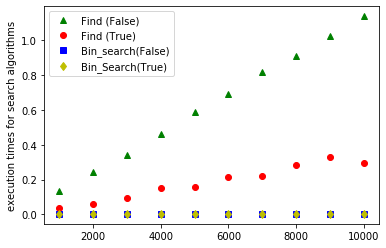

'plot finished'

In [29]:
plot_all_search_algo(1000)

De grafieken bevestigen de theoretische voorspellingen over het tijdsgebruik van de zoekalgoritmen. `find` is $O(n)$, beide grafieken zijn ongeveer rechten. Voor elementen die niet in de lijst zitten is de rechte stijler dan voor elementen die wel wel worden teruggevonden. Voor `bin-search`, theoretisch $O(log(n))$, zie je inderdaad dat de tijd nodig om een element te zoeken maar heel traag stijgt met de lengte van de lijsten. Je kan de codecel een paar keer uitproberen om pieken die het gevolg zijn van de andere dingen die je computer aan het doen is te vermijden of om met nog langere lijsten te testen. Let wel op, als je `m` heel groot kiest kan het wel een tijdje duren om alle tijdmetingen te doen.

## Sorteren van Lijsten
--------------------

Zoals reeds gezegd in de inleiding is sorteren een veelgebruikte
functionaliteit voor computers. Maar hoe kan een computer een lijst van
$n$ elementen in de juiste volgorde zetten? En hoe lang zal dat dan
duren? In wat volgt onderzoeken we enkele sorteeralgoritmen en
bestuderen we hun snelheid.

### Insertion Sort

We beginnen met *insertion sort*. Dit is een zeer eenvoudig algoritme dat
gelijkt op de manier waarop kaartstpelers hun kaarten in de juiste
volgorde steken. Bij het delen van de kaarten zal degene die deelt de
kaarten willekeurig op tafel leggen (met de rugzijde naar boven
uiteraard, maar dat is hier niet relevant). Iedere kaarspeler zal dan
beginnen met een lege hand en de gedeelde kaarten er met de andere hand
één per één tussensteken in de juiste volgorde. Op ieder moment neemt de
speler dus een volgende kaart --- uit de ongesorteerde hoop --- en steekt hij die
(Eng: to insert) op de juiste plaats in de reeds-gesorteerde hand.

Indien we dit principe nu toepassen op ongesorteerde lijsten in Python,
krijgen we het volgende algoritme:

In [30]:
def insertion_sort(lst):
    for idx in range(0, len(lst)):
        insert(lst,idx)
        
def insert(lst,idx):
    elm = lst[idx]
    while idx > 0 and lst[idx-1] > elm:
        lst[idx] = lst[idx-1]
        idx      = idx-1
    lst[idx] = elm

In [31]:
test = ["jan", "ann","ils","jef", "mia"]

In [32]:
insertion_sort(test)

In [33]:
test

['ann', 'ils', 'jan', 'jef', 'mia']

`insertion_sort` wandelt met een `for` ieder element in de lijst af, van links
naar rechts. Ze roept voor iedere index `idx` de hulpfunctie `insert`
op. Deze zal het `idx`'ste element van de lijst juist steken in de reeds
gesorteerde elementen. Op ieder moment zal onze lijst bestaan uit twee
(ongelijke) delen. Het linkerdeel is het reeds gesorteerde deel en het
rechterdeel is het nog te sorteren deel. Telkens nemen we dus (met
`idx`) het eerste elementje van het rechterdeel (wat steeds kleiner
wordt) en steken we dat op de juiste plaats in het linkerdeel (wat
steeds groter wordt). `insert` doet dat door in het linkerdeel van index
`idx` te lopen naar `0` toe. Zolang we elementen zien die groter zijn
dan het juist te steken element `elm`, schuiven we die 1 plaats naar
rechts op. Anders steken we ons elementje op de zopas vrij gekomen
plaats en zijn we klaar.

Om te volgen wat gebeurt tracen we hier eerst de werking van `insert` op een voorbeeldlijst waarvan de eerste 6 elementen al gesorteerd staan. De elementen die al 'goed' staan zijn groen gekleurd. We illustreren hoe het element op positie $6$ (in  het voorbeeld het getal `3`) naar de juiste positie verhuist door eerst alle elementen die groter zijn naar rechts op te schuiven. De gele kleur in de trace verduidelijkt welke elementen daarvoor bekeken en eventueel opgeschoven worden. De grijs weergegeven elementen spelen niet mee in deze `insert` stap.

In [34]:
test = [1,2,4,6,7,8,3,9,2,8,6,3]
show_insert(test,6)

1 2 4 6 7 8 3 9 2 8 6 3 
1 2 4 6 7 8   9 2 8 6 3 
1 2 4 6 7   8 9 2 8 6 3 
1 2 4 6   7 8 9 2 8 6 3 
1 2 4   6 7 8 9 2 8 6 3 
1 2   4 6 7 8 9 2 8 6 3 
1 2 3 4 6 7 8 9 2 8 6 3 


In de trace van `insertion_sort` zelf zie je dan dat startend van links telkens een extra element wordt 'goed' gezet. Je kan door de gele kleur ook vaststellen dat het aantal elementen dat daarvoor 'bekeken' wordt variabel is in elke iteratie slag maar kleiner dan of gelijk is aan het aantal elementen dat al gesorteerd staat in die iteratie slag.

In [35]:
test = [6,2,4,1,7,8,3,9,2,7,6,3]
show_insertion_sort(test)

6 2 4 1 7 8 3 9 2 7 6 3 
6 2 4 1 7 8 3 9 2 7 6 3 
6 2 4 1 7 8 3 9 2 7 6 3 
2 6 4 1 7 8 3 9 2 7 6 3 
2 4 6 1 7 8 3 9 2 7 6 3 
1 2 4 6 7 8 3 9 2 7 6 3 
1 2 4 6 7 8 3 9 2 7 6 3 
1 2 4 6 7 8 3 9 2 7 6 3 
1 2 3 4 6 7 8 9 2 7 6 3 
1 2 3 4 6 7 8 9 2 7 6 3 
1 2 2 3 4 6 7 8 9 7 6 3 
1 2 2 3 4 6 7 7 8 9 6 3 
1 2 2 3 4 6 6 7 7 8 9 3 
1 2 2 3 3 4 6 6 7 7 8 9 

**Performantie**

Wat is de snelheid van dit algoritme? De eerste keer moeten we een
element tussenvoegen in een lijst van lengte $0$. De tweede keer moeten
we een element tussenvoegen in een lijst van lengte $1$. De derde keer
moeten we een element tussenvoegen in een lijst van lengte $2$.
Enzoverder. De laatste keer moeten we een element toevoegen in een lijst
van lengte $n-1$. In het allerslechtste geval is de data omgekeerd
gesorteerd. In dat geval kost een element toevoegen in een lijst van
lengte $i$ ons $O(i)$ computationele stappen. In totaal krijgen we dus
$\displaystyle\sum_{i=1}^{n-1}{i} = \frac{1}{2}n(n-1) = O(n^{2})$
stappen. Insertion sort heeft een interessante best-case. Indien we de
functie oproepen met een lijst die reeds gesorteerd is zal het
tussenvoegen slechts 1 stapje vereisen (vergewis je hiervan met onderstaande trace). In dat
geval is de totale hoeveelheid werk dus slechts $O(n)$. Inderdaad, de
functie `sort` zal met de `for` alle elementen beschouwen en ze
tussenvoegen (in 1 stap).

In [36]:
test = [1,2,3,4,5,6,7,8,9]
show_insertion_sort(test)

1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 

### Selection Sort

Een tweede algoritme krijgen we door de omgekeerde redenering van
insertion sort te maken. In de plaats van elementen goed te steken in het reeds gesorteerde deel, gaan we telkens het "volgende" element selecteren
uit de nog te sorteren data. Vandaar de naam *selection sort*. 
Als we sorteren van klein naar groot zullen we dus telkens het kleinste element zoeken in het nog onbehandelde deel van de lijst en dat achteraan toevoegen aan het reeds gesorteerde deel van de lijst.

Onderstaande functies tonen een implementatie van selection sort in
Python. De procedure `selection_sort` loopt alle indices `idx` af van links naar
rechts. Opnieuw zal de lijst op ieder moment uit twee stukken bestaan.
De data die links van `idx` zit is netjes gesorteerd en de data die
rechts van `idx` zit is nog ongesorteerd. Op ieder moment zoeken we in
de data rechts van `idx` de *index* van het kleinste element. Deze index
noemen we `sid` (wat staat voor "smallest index"). Na afloop wisselen we
het `idx`'ste element met het element dat op index `sid` zit en gaat
`for` verder met de volgende `idx`. De rechtse hoop ongesorteerde data
wordt dus steeds kleiner. Telkens opnieuw voegen we het kleinste element
toe aan de gesorteerde rij die steeds langer wordt.

In [37]:
def selection_sort(lst):
    for idx in range(0, len(lst)):
        sid = select(lst,idx)
        lst[idx], lst[sid] = lst[sid], lst[idx] #verwissel
        
def select(lst,idx):
    sma = idx
    elm = lst[idx]
    while idx < len(lst):
        if lst[idx] < elm:
            sma = idx
            elm = lst[idx]
        idx = idx + 1
    return sma

`select` is de functie die in een lijst `lst` vanaf `idx` (tot het einde
van de lijst) zoekt naar de index van het kleinste element. Op ieder
moment is `sma` deze index en is `elm` dat element. Indien we bij het
overlopen van de lijst een element `lst[idx]` tegenkomen dat nóg kleiner
is, updaten we zowel `sma` als `elm`. We geven uiteindelijk de index
`sma` van het kleinste element weer.

We kunnen opnieuw het algoritme testen door een lijstje te maken en de `selection_sort`
functie erop los te laten. Het lijstje zal door de functie gemuteerd
worden opdat alle elementen in de juiste volgorde komen te staan.

In [38]:
test = ["jan", "ann","ils","jef", "mia"]

In [39]:
selection_sort(test)

In [40]:
test

['ann', 'ils', 'jan', 'jef', 'mia']

Om te volgen wat gebeurt tracen we hier eerst de werking van `select` op een voorbeeldlijst waarvan de eerste 3 elementen al gesorteerd staan. We illustreren hoe vanaf het element op derde positie (in  het voorbeeld het getal `6`) naar het kleinste getal gezocht wordt in de rest van de lijst. De gele kleur in de trace verduidelijkt welke elementen daarvoor bekeken worden. De magenta kleur accentueert het element dat in elke iteratie als 'kleinste tot nu toe' is aangemerkt.

In [41]:
test = [1,2,2,6,9,4,2,6,4,7,8,3]
show_select(test,3)

1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 2 6 4 7 8 3 



6

In de trace van `selection_sort` zelf zie je dan dat startend van links telkens een extra element wordt toegevoegd aan het reeds gesorteerde voorste deel. Je kan door de gele kleur ook vaststellen dat om het kleinste element te vinden in de rest van de lijst *alle* elementen in de rest van de lijst moeten bekeken worden. 

In [42]:
test = [4,2,8,6,9,4,2,6,1,7,8,3]
show_selection_sort(test)

4 2 8 6 9 4 2 6 1 7 8 3 
4 2 8 6 9 4 2 6 1 7 8 3 
1 2 8 6 9 4 2 6 4 7 8 3 
1 2 8 6 9 4 2 6 4 7 8 3 
1 2 2 6 9 4 8 6 4 7 8 3 
1 2 2 3 9 4 8 6 4 7 8 6 
1 2 2 3 4 9 8 6 4 7 8 6 
1 2 2 3 4 4 8 6 9 7 8 6 
1 2 2 3 4 4 6 8 9 7 8 6 
1 2 2 3 4 4 6 6 9 7 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 8 9 8 
1 2 2 3 4 4 6 6 7 8 8 9 
1 2 2 3 4 4 6 6 7 8 8 9 

**Performantie**

Wat is de snelheid van selection sort? Dit keer is er geen best-case die
verschilt van de worst-case. We gaan in de `for` constructie van links
naar rechts en roepen `select` aan. In `select` gaan we van `idx`
helemaal tot het einde van de lijst (altijd!). De eerste keer zal
`select` dus $n$ elementen doorlopen. De tweede keer zal dat maar $n-1$
elementen meer zijn. Daarna $n-2$. Enzoverder. De allerlaatste keer zal
`select` nog een slechts $1$ element meer moeten doorlopen. In totaal
krijgen we dus
$\displaystyle\sum_{i=1}^{n}{i} = \frac{1}{2}n(n+1) = O(n^{2})$ stappen.

In [43]:
test = [1,2,3,4,5,6,7,8,9]
show_selection_sort(test)

1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 

### Quicksort

Zowel `insertion_sort` als `selection_sort` algoritmen vertonen dus een $O(n^2)$ gedrag. 
Men zou kunnen denken dat dit het lot des levens is indien we een computer
willen laten sorteren, maar dit is gelukkig niet het geval. We gaan nu
over tot de bespreking van een algoritme dat veel sneller is. Het werd
in de jaren $60$ uitgevonden door C.A.R. Hoare en staat bekend onder de
naam *quicksort*. We zullen aantonen dat quicksort een performantie
heeft die in $O(n.log(n))$ zit. Quicksort is niet het enige
sorteeralgoritme dat in $O(n.log(n))$ zit maar wel het meest beroemde.

We zullen het quicksort algoritme uitleggen in 2 fasen. De eerste fase
bestaat uit het begrijpen van het principe. We zullen dit illustreren
aan de hand van de volgende (nogal inefficiënte) versie van quicksort.
In de tweede fase zullen we hetzelfde algoritme dan herimplementeren met
een scherper oog voor performantie en voor geheugengebruik.

In [44]:
def simple_quicksort(lst):
    if lst==[]:
        return []
    else:
        pivot   = lst[0]
        lesser  = simple_quicksort([x for x in lst[1:] if x < pivot])
        greater = simple_quicksort([x for x in lst[1:] if x >= pivot])
        return lesser + [pivot] + greater

Quicksort is een recursief algoritme dat een lijst opbreekt in
deellijsten. Indien de invoerlijst leeg is, is het sorteren triviaal en
is het resultaat de lege lijst. Indien de lijst niet leeg is, beschouwen
we het element op de eerste plaats (t.t.z. `lst[0]`). We zullen dit
element de *pivot* noemen. Dan lopen we door de lijst `lst` en plukken
we er alle elementen uit die strikt kleiner zijn dan het pivot element
en plukken we er alle elementen uit die groter zijn dan het pivot
element. Dit resulteert in twee nieuwe lijsten die we allebei recursief
sorteren. Het eindresultaat bestaat dan uit de gesorteerde lijst van
elementen die kleiner zijn dan de pivot, gevolgd door de pivot, gevolgd
door de gesorteerde lijst van elementen die groter zijn dan de pivot.

Bovenstaande code is op twee manieren nogal inefficiënt:

- Om de twee deellijsten te bepalen wordt er *twee* keer door `l[1:]` gelopen. 

- Tijdens de recursie worden er in iedere recursieve oproep twee *nieuwe* lijsten gemaakt. Dit gebeurt door de twee list comprehensions in de code. Alle elementen worden door Python uit `lst` gekopieerd naar de nieuwe lijsten `lesser` en `greater`. 
    
Een gevolg van dit laatste is dat wanneer we deze versie van het algoritme testen door een lijstje te maken en de `simple_quicksort`  functie erop los te laten er een nieuwe lijst wordt teruggegeven die inderdaad dezelfde elementen als de originele lijst bevat in de juiste volgorde. Maar de originele lijst is niet veranderd.

In [45]:
test = ["jan", "ann","ils","jef", "mia"]

In [46]:
simple_quicksort(test)

['ann', 'ils', 'jan', 'jef', 'mia']

In [47]:
test

['jan', 'ann', 'ils', 'jef', 'mia']

De volgende code toont een "standaardversie" van quicksort die deze
problemen niet heeft. 

- Er wordt slechts 1 keer door de lijst gelopen om meteen alle elementen kleiner dan de pivot te scheiden van de elementen die groter zijn dan de pivot.
    
- Het geheel werkt in op de originele lijst door de deellijsten te bekijken als stukken  van de originele lijst die afgebakend zijn m.b.v. een koppel indices die variëren doorheen de  uitvoering van het algoritme.   

In [48]:
def quicksort(lst):
    quick_rec(lst,0,len(lst)-1)
    
def quick_rec(lst,l,r):
    if l < r:
        m = partition(lst, l, r)
        quick_rec(lst, l, m-1)
        quick_rec(lst, m+1, r)
    
def partition(lst,l,r):
    pivot = lst[l]
    i = l+1
    j = r
    while i <= j:
        while i <= j and lst[i] < pivot:
            i = i + 1
        while i <= j and pivot <= lst[j]:
            j = j - 1
        if i < j:
            lst[i], lst[j] = lst[j], lst[i]
    lst[l], lst[j] = lst[j], pivot
    return j

Het basisprincipe achter dit algoritme is exact hetzelfde. De uitwerking
is echter veel vernuftiger. In plaats van de lijst op ieder niveau van
de recursie daadwerkelijk op te delen in $2$ verse lijsten en de
gesorteerde versies van die lijsten dan opnieuw aan elkaar te plakken
m.b.v. `+`, gaan we alle data laten zitten in de originele lijst maar
dan wel op andere plaatsen. `quicksort` aanroepen op een testlijst heeft als effect dat de elementen in de lijst op volgorde komen te staan.

In [49]:
test = ["jan", "ann","ils","jef", "mia"]

In [50]:
quicksort(test)

In [51]:
test

['ann', 'ils', 'jan', 'jef', 'mia']

Het is de taak van de `partition`
hulpfunctie om een stuk lijst tussen de grenzen `l` en `r` goed te zetten. Het eerste
elementje (t.t.z. op `lst[l]`) wordt als *pivot* gekozen. Vanaf dan
gaat `partition` de elementen zodanig herschikken dat alle elementen
tussen `l` en `r` die kleiner zijn dan de pivot links van de pivot komen
te staan, en zodanig dat alle elementen tussen `l` en `r` die groter dan of gelijk zijn aan de pivot rechts van de pivot komen te staan. De pivot zal dus
het enige element zijn dat op zijn juiste plaats komt te staan. Die
plaats wordt met `return` teruggegeven uit `partition` en wordt de `m` in de recursieve hoofdfunctie. Al wat deze dus nog moet doen is het
algoritme recursief aanroepen voor beide helften, t.t.z. één keer tussen
`l` en `m-1` en één keer tussen `m+1` en `r`.

Hoe gaat `partition` tewerk? De functie werkt met twee wijzertjes `i` en
`j`. `i` vertrekt van links vlak na de pivot en werkt
naar rechts toe. `j` vertrekt van het rechter einde en werkt naar links
toe. 
`i` wordt naar rechts opgeschoven (doe
`i=i+1`) zolang de elementen die we tegenkomen kleiner zijn dan de
pivot. `j` wordt naar links opgeschoven (doe
`j=j-1`)zolang de elementen
die we tegenkomen groter dan of gelijk zijn aan de pivot. 
De extra testen in de binnenste `while` lussen zijn om niet 'uit' het deel van de lijst te vallen waar we op dit moment in geïnteresseerd zijn.

Op moment dat deze binnenste `while` lussen stoppen  en `i` nog kleiner is dan `j` wisselen we de elementen op index `i` en `j` zodat het element kleiner dan de pivot links komt te staan en het element groter dan de pivot rechts komt te staan. 

Opnieuw gaan we dan de
buitenste `while` lus in om `i` en `j` verder naar elkaar toe te laten
schuiven. Na verloop van tijd zullen de  wijzertjes `i` en `j` mekaar raken of voorbij lopen. Op dat moment is `j` de plaats
waar de pivot terecht moet komen. 
We wisselen dan de pivot met het
elementje `lst[j]` zodat de pivot op zijn plaatst staat. 

We illustreren hieronder de werking van `partition` door een voorbeeldlijst te laten zien die zal opgedeeld worden door haar eerste element als `pivot` te gebruiken. We accentueren voor elke iteratieslag van de buitenste `while` de indexen `i` en `j` op hun startpositie in magenta. In binnenste `while` lussen schuift `i` naar rechts en `j` naar links tot een element wordt gevonden dat groter, respectievelijk kleiner is dan de `pivot`. We kleuren de elementen die daarbij bekeken worden in magenta. Dan volgt een verwisseling. Na de verwisseling kleuren de reeds bekeken elementen geel. Dat gaat zo door tot  `i` en `j` elkaar voorbij lopen en dan wordt de `pivot` naar de juiste positie verplaatst. Hij wordt dat groen geaccentueerd. Alle elementen links van de `pivot` (het getal `7` op positie $10$) zijn nu kleiner dan de  `pivot`, al de getallen rechts er van zijn groter. De gele kleur duidt aan dat ze bekeken werden.

In [52]:
test = [7,3,8,2,4,1,8,9,4,6,2,6,3,6,9,8]
show_partition(test,0,len(test)-1)

7 3 8 2 4 1 8 9 4 6 2 6 3 6 9 8 

7 3 8 2 4 1 8 9 4 6 2 6 3 6 9 8 
7 3 > 2 4 1 8 9 4 6 2 6 3 < 9 8 

7 3 6 2 4 1 8 9 4 6 2 6 3 8 9 8 
7 3 6 2 4 1 > 9 4 6 2 6 < 8 9 8 

7 3 6 2 4 1 3 9 4 6 2 6 8 8 9 8 
7 3 6 2 4 1 3 > 4 6 2 < 8 8 9 8 

7 3 6 2 4 1 3 6 4 6 2 9 8 8 9 8 
7 3 6 2 4 1 3 6 4 6 < > 8 8 9 8 

2 3 6 2 4 1 3 6 4 6 7 9 8 8 9 8 


10

We illustreren nu `quicksort` zelf. Het is een boomrecursief algoritme.  Om de opeenvolgende aanroepen op te volgen wordt iedere keer het stuk lijst tussen de posities `l` en `r` dat onder handen genomen wordt in het blauw getoond. De `pivot` wordt in het geel geaccentueerd. De rest van de lijst wordt in die aanroep niet bekeken en wordt daarom in het grijs getoond. We accentueren ook de pivot van de vorige recursiestap in het groen. Bij het terugkeren uit de recursie kleurt de lijst stukje bij stukje groen omdat die elementen dan 'goed' staan.

In [53]:
test = [7,2,4,8,6,9,4,2,6,1,8,3]
show_quicksort(test)

7 2 4 8 6 9 4 2 6 1 8 3 
6 2 4 3 6 1 4 2 7 9 8 8 
4 2 4 3 2 1 6 6 7 9 8 8 
2 2 1 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 9 8 8 
1 2 2 3 4 4 6 6 7 8 8 9 
1 2 2 3 4 4 6 6 7 8 8 9 
1 2 2 3 4 4 6 6 7 8 8 9 
1 2 2 3 4 4 6 6 7 8 8 9 


**Performantie**

Om de snelheid van quicksort te bepalen zullen we het totaal aantal
stappen tellen dat het algoritme dient uit te voeren. Al wat we dienen
te doen is de som te nemen van het totaal aantal stappen die ooit door
het algoritme zullen uitgevoerd worden. Noteer $W_{i}(n)$ als de totale
hoeveel vergelijkingen en verwisselingen (t.t.z. de hoeveelheid werk)
die zullen uitgevoerd worden in het $i^{de}$ niveau van de recursie. We
hebben duidelijk $W_{0}(n) = n$ vermits het nulde niveau de hele lijst
moet doorlopen. $W_{1}(n) = n-1$ omdat het nulde niveau de pivot goed
heeft gestoken zodat beide recursieve oproepen in totaal alle elementen
zullen beschouwen behalve de reeds goedgestoken pivot. Op dit ogenblik
dienen we een onderscheid te maken tussen de best-case en de worst-case.

*Best-case Analyse:*

In het beste geval hebben we steeds zeer veel geluk en zal de pivot
    zodanig zijn dat er precies evenveel elementen kleiner dan de pivot
    zijn, als er elementen zijn die groter dan de pivot zijn. In dat
    geval wordt de lijst tussen `l` en `r` op ieder recursieniveau
    perfect in tweeën verdeeld. In beide recursieve oproepen tesamen
    zullen er opnieuw twee pivot's worden goedgestoken. Bijgevolg is
    $W_{2}(n) = n-3$. In het algemeen krijgen we op het $i^{de}$ niveau
    van de recursie een hoeveelheid werk die correspondeert met
    $W_{i}(n) = n- (2^{i}-1)$. Om te weten hoeveel recursieniveaus er
    zoal zijn, dienen we te weten hoe dikwijls we een lijst van lengte
    $n$ door $2$ kunnen delen. Het antwoord hierop is natuurlijk
    $log_{2}(n)$. In het beste geval moeten we dus al het werk bij
    elkaar tellen voor $log_{2}(n)$ niveaus in de recursie. M.a.w.
    $\displaystyle\sum_{i=0}^{log_{2}(n)}{W_{i}(n)}$. Bijgevolg:

$$\begin{aligned}
\displaystyle\sum_{i=0}^{log_{2}(n)}{W_{i}(n)} & = & \displaystyle\sum_{i=0}^{log_{2}(n)}{n- (2^{i}-1)} \nonumber \\
& = & \displaystyle\sum_{i=0}^{log_{2}(n)}{n} - \displaystyle\sum_{i=0}^{log_{2}(n)}{2^{i}} + \displaystyle\sum_{i=0}^{log_{2}(n)}{1}  \nonumber  \\
& = & n.log_{2}(n) - \left( \frac{2^{log_{2}(n)+1}-1}{2-1} \right) + log_{2}(n) \nonumber  \\
& = & n.log_{2}(n) - \left( 2.2^{log_{2}(n)}-1 \right) + log_{2}(n) \nonumber  \\
& = & n.log_{2}(n) - (2.n -1 ) + log_{2}(n) \nonumber \\
& = & O(n.log(n)) \nonumber \end{aligned}$$

*Worst-case Analyse:*

Maar we kunnen echter ook heel veel tegenslag hebben. Stel dat we
    quicksort toepassen op een lijst die reeds gesorteerd is. In dat geval zal de pivot steeds het
    kleinste element zijn van alle elementen tussen `l` en `r`. Er
    zullen dus *geen* elementen links van de pivot komen en alle
    elementen zullen rechts van de pivot komen te staan. In ieder niveau
    van de recursie wordt er dus slechts $1$ stapje minder werk gedaan
    dan in het vorige niveau, of nog $W_{i}(n) = n-i$. De linkse
    recursieve oproep zal dus geen werk verrichten en meteen terugkeren.
    De rechtse recursieve oproep moet al het werk doen, behalve het ene
    stapje van het vorige niveau. We krijgen dus in totaal $n$
    recursieve oproepen. Alles bij elkaar tellen geeft dit keer dus
    $\displaystyle\sum_{i=0}^{n}{W_{i}(n)}$. Indien we dit opnieuw
    uitrekenen krijgen we een uitkomst in $O(n^{2})$
    
Onderstaande trace illustreert dit. Er zijn 9 aanroepen nodig om een reeds gesorteerde lijst van 9 elementen te sorteren.

In [54]:
test = [1,2,3,4,5,6,7,8,9]
show_quicksort(test)

1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 


Een gelijkaardig scenario doet zich voor bij een invoerlijst die *omgekeerd* gesorteerd is. Er
    zullen nu *geen* elementen rechts van de pivot komen en alle
    elementen zullen links van de pivot komen te staan. In ieder niveau
    van de recursie wordt er dus slechts $1$ stapje minder werk gedaan
    dan in het vorige niveau. De rechtse
    recursieve oproep zal dus geen werk verrichten en meteen terugkeren.
    De linkse recursieve oproep moet al het werk doen, behalve het ene
    stapje van het vorige niveau. We krijgen dus in totaal $n$
    recursieve oproepen zoals de trace hieronder illustreert.

In [55]:
test = [9,8,7,6,5,4,3,2,1]
show_quicksort(test)

9 8 7 6 5 4 3 2 1 
1 8 7 6 5 4 3 2 9 
1 8 7 6 5 4 3 2 9 
1 2 7 6 5 4 3 8 9 
1 2 7 6 5 4 3 8 9 
1 2 3 6 5 4 7 8 9 
1 2 3 6 5 4 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 


**Performantieverbetering**

Quicksort is een zeer goed sorteeralgoritme. Men kan met voldoende harde
wiskunde aantonen dat het gemiddelde geval toch in $O(n.log(n))$ zit.
Het bovenstaande worst-case geval is dus een pathologisch geval. Maar
het is helaas een pathologisch geval dat zich in de praktijk redelijk
dikwijls voordoet. Indien we bvb. in iTunes $2$ keer op hetzelfde flapje
clicken, is het de bedoeling dat de reeds gesorteerde playlist in de
omgekeerde volgorde gesorteerd dient te worden. In dat geval zou
quicksort dus zeer slecht scoren. Men zegt dat quicksort *ontaardt* (of
ook wel: *degenereert*). Er zijn hier verschillende mouwen aan te passen
die buiten het bestek van deze cursus vallen. Eén van de eenvoudigste
bestaat erin van helemaal in het begin van iedere `partition` het eerste
element (onze oude pivot dus) te verwisselen met een willekeurig element
dat tussen `l` en `r` zit. Deze *randomized quicksort* blijkt in de
praktijk vrij goed te werken. Een variant die geen random functie nodig heeft is om als pivot de mediaan te kiezen van het eerste, het laatste en het middelste element van de lijst.

### Experimentele Verificatie

Het is leerrijk om de theoretische studie m.b.v. $O$ te vergelijken met de echte data die uit een profile komt. We gebruiken in de experimenten 
lijsten met random getallen er in. We doen hiervoor beroep op de functie `randint` in de module `random`. Deze geeft een willekeurig getal weer dat tussen beide parameters ligt. `randint(1,100)` geeft bijvoorbeeld een willekeurig getal tussen $1$ en $100$. 

Een lijst genereren van een gevraagde lengte met getallen die random gekozen zijn tussen grenzen 1 en `n//2` kan makkelijk met een *list comprehension* zoals hieronder in de functie `generate_lst` gebeurt. De reden waarom we getallen genereren binnen grenzen die afhangen van de lengte van de lijst is om de kans dat een zelfde getal meer dan 1 keer voorkomt in alle lengtes van lijsten even groot te maken.

In [56]:
import random

def generate_lst(n):
    return [random.randint(1,n//2) for i in range(0,n)]

Het timen van de functieaanroep gebeurt zoals we al eerder deden met de `time` module.

In [57]:
import time

def time_insertion_sort(lst):
    t1 = time.time()
    insertion_sort(lst)
    t2 = time.time() 
    return (t2-t1)

def time_selection_sort(lst):
    t1 = time.time()
    selection_sort(lst)
    t2 = time.time() 
    return (t2-t1)

def time_quicksort(lst):
    t1 = time.time()
    quicksort(lst)
    t2 = time.time() 
    return (t2-t1)

Met behulp van Matplotlib gaan we nu 3 grafieken uitzetten door de tijdmetingen te doen voor de 3 algoritmen voor random gegenereerde lijsten met lengtes oplopend van $m$ tot $10$ keer $m$ met stappen van $m$. Dat kan door voor alle `n` in de `range(m,m*10+1,m)` een lijst te genereren met lengte `n`, het sorteren van de lijst te timen, en de meetwaarden uit te zetten. Let op, voor grote $m$ kan dit wel eventjes duren.

In [58]:
import matplotlib.pyplot as plt

In [59]:
def plot_all_sort_algo(m):
    x_values = list(range(m,m*10+1,m))
    y_values = [time_insertion_sort(generate_lst(n)) for n in range(m,m*10+1,m)]
    plt.plot(x_values,y_values, 'g^', label = "InsSort")
    y_values = [time_selection_sort(generate_lst(n)) for n in range(m,m*10+1,m)]
    plt.plot(x_values,y_values, 'ro', label = "SelSort")
    y_values = [time_quicksort(generate_lst(n)) for n in range(m,m*10+1,m)]
    plt.plot(x_values,y_values, 'yd', label = "Quicksort")
    plt.ylabel('execution times for 3 sorting algorithms')
    plt.legend()
    plt.show()        
    return "plot finished"

Het resultaat voor lijsten met lengtes van 1000,2000,..., tot 10.000 wordt getoond in onderstaande figuur. De theoretische voorspellingen (t.t.z. $O(n.log(n))$ en $O(n^2)$) worden netjes experimenteel
bevestigd. De grafieken voor insertion sort en selection sort zijn parabolen. De grafiek voor quicksort is veel platter. Een lijst sorteren met 10.000 elementen met een basis sorteeralgoritme neemt al enige tijd. De tijd die quicksort nodig heeft is significant kleiner. In twee kleine experimenten onder de grafiek zie je dat quicksort een lijst van 1 miljoen elementen kan sorteren binnen de tijd die insertion-sort nodig heeft om tienduizend elementen te sorteren.

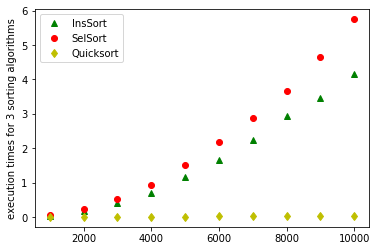

'plot finished'

In [60]:
plot_all_sort_algo(1000)

In [61]:
test = generate_lst(10000)
time_insertion_sort(test)       

4.237020969390869

In [62]:
test = generate_lst(1000000)
time_quicksort(test)       

3.7103018760681152

### De theoretische O(n.log(n)) ondergrens

Zijn er grenzen aan de snelheid van algoritmen? Voor sommige problemen
is dit een onopgeloste vraag. Voor sorteren is het antwoord bekend:
nooit zal een algemeen sorteeralgoritme gevonden worden dat de
$O(n.log(n))$ performantie verslaat. Met een "algemeen" algoritme wordt bedoeld een algoritme dat enkel
    gebruik maakt van "vergelijken van elementen" en "verplaatsen van
    elementen". Er bestaan algoritmen die toch sneller kunnen, maar deze
    zijn dan enkel toepasbaar op specifieke soorten gegevens. Zo is bvb.
    *counting sort* in $O(n+k)$ enkel toepasbaar op positieve gehele getallen waarbij de tweede factor k relateert aan de grootte van de getallen die worden gesorteerd.
    
Als afsluiting van deze topic leveren we het wiskundig bewijs voor onderstaande stelling over algemene sorteeralgoritmen.

**Stelling:**

Het is onmogelijk een algemeen sorteeralgoritme te schrijven dat sneller gaat dan $n.log(n)$.

**Bewijs:**


Beschouw een rij $e_{0}$, $e_{1}$, $e_{2}$, \..., $e_{l-1}$ van $n$ data
elementen die gesorteerd dienen te worden. Een algemeen algoritme
gebaseerd op vergelijken van elementen zal dus heel de tijd bezig zijn
met het vergelijken van 2 elementen gevolgd door eventueel verplaatsen
van die 2 elementen. Uiteindelijk betekent sorteren dat we de elementen op een bepaalde manier herordenen,
d.w.z. permuteren. De lijst na het sorteren is immers een permutatie van
de lijst vóór het sorteren. En uit de wiskunde weten we dat er $n!$ mogelijke permutaties zijn voor een lijst van lengte $n$.

We kunnen alle mogelijke uitvoeringen van een sorteeralgoritme
tekenen in de vorm van een beslissingsboom. Als illustratie genereert de functie `show_decision_tree` 
die we knutselden in de module `Pretty_print` de figuur hieronder. Deze boom toont alle mogelijke
gevallen voor $n=3$ elementen. Iedere knoop in
die boom bestaat uit de vergelijking van twee elementen. Afhankelijk
van het resultaat van die vergelijking gaat het algoritme verder met het
vergelijken van twee andere elementen. Afhankelijk van de initiële
volgorde van de elementen zal de uitvoering van het algoritme
corresponderen met één pad (van de top naar een blad) in die boom.

In [63]:
from Pretty_print import *
print_decision_tree()

                                       e₁<e₂
                      ___________________|_________ 
                     |                             |
                   e₀<e₁                         e₀<e₁
                 ____|_________                ____|_________ 
                |              |              |              |
              e₀e₁e₂         e₀<e₂          e₀e₂e₁         e₀<e₂
                           ____|____                     ____|____ 
                          |         |                   |         |
                        e₁e₀e₂    e₁e₂e₀              e₂e₀e₁    e₂e₁e₀





We weten dat die boom $n!$ mogelijke bladeren heeft omdat er  $n!$ permutaties bestaan. 
Dus hebben we zeker meer dan 
$n!$ mogelijke knopen en dus is de hoogte van de boom $h$ zeker hoger dan $log(n!)$.
Vermits nu $log(n!) > n.log(n)$ voor grote $n$ kunnen we concluderen dat
$h > n.log(n)$. Met de wetenschap dat $h$ het aantal vergelijkingen is
(d.w.z. de hoogte van de beslissingsboom), krijgen we dus dat er
minstens minstens $n.log(n)$ stappen ondernomen moeten worden.

We moeten dus nog aantonen dat $log(n!) > n.log(n)$ voor alle $n$ vanaf
een bepaalde $n_0$. Hier is een eenvoudig bewijs:

$$\begin{aligned}
log(n!) & = & \displaystyle\sum_{i=1}^{n}{log(i)} \\
& > & \displaystyle\sum_{i=\lceil(\frac{n+1}{2})\rceil}^{n}{log(i)}  \\
& > & \displaystyle\sum_{i=\lceil(\frac{n+1}{2})\rceil}^{n}{log(\frac{n}{2})}  \\
& > & \frac{n}{2}.log(\frac{n}{2}) \\
& = & \frac{n}{2}.(log(n) - 1) \\
& = & \frac{n.log(n)}{2} - \frac{n}{2} \\
& > & \frac{n.log(n)}{2} - \frac{n.log(n)}{6} \textrm{~~indien $n>8$}\\
& = & \frac{1}{3}n.log(n) \\\end{aligned}$$

Dus is $log(n!) > \frac{1}{3}.n.log(n)$ voor alle $n > n_0=8$.

## Conclusie
---------

In dit hoofdstuk hebben we twee van de belangrijkste problemen
onderzocht waarvoor computers gebruikt worden: het zoeken van gegevens
in een (grote) hoop gegevens en het sorteren van gegevens in de juiste
volgorde. We hebben voor deze twee problemen ook de theoretische $O$ besproken.